In [157]:
def load_clinical_eeg_data(datapath, sub):
    # input arguments:
    # datapath (string): path to the root directory
    # sub (string): subject ID (e.g. chb01, chb02, etc)
    
    # output:
    # eegdata (numpy array): samples x channels data matrix
    # eegevents (pandas dataframe): labels and chunks
    # channel_names (list): names of the channels
    import pandas as pd
    alldata = pd.read_csv(os.path.join(datapath, sub + '.csv')) #removed 'train' bc of how I saved
    alldata.rename(columns={'Unnamed: 0': 'Index'})
    eegevents = alldata[['labels', 'chunks']]
    alldata.drop(['Unnamed: 0', 'labels', 'chunks'], axis=1, inplace=True)
    names = alldata.keys()
    return alldata.iloc[:].as_matrix(), eegevents, names


import os
#Appropriate dir
os.chdir("/Users/leilasolouki/Desktop/train")
path = os.getcwd()


#Get subject names from appropriate dir, -4 for .csv suffux
subjects = [f[:-4] for f in os.listdir(path)]

data, label_chunk, nodes = load_clinical_eeg_data('',subjects[0])



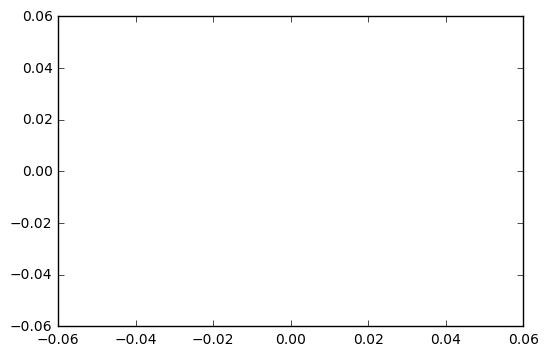

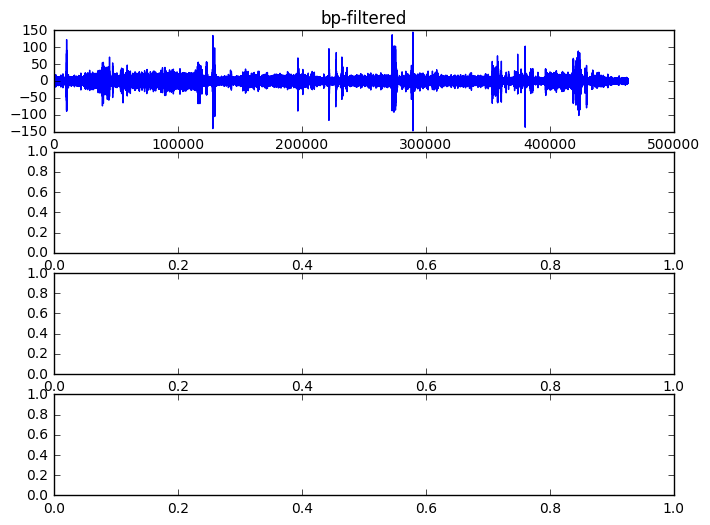

In [158]:
def apply_filters(x, order=4, fs=512.0, filt=None, btype='low', axis=0):
    from scipy.signal import butter, filtfilt
    nyq = .5 * fs
    
    if filt is None:
        return x
    if isinstance(filt, list):
        f = [i/nyq for i in filt]
        btype='band'
    else:
        f = filt/nyq
        
    b, a = butter(order, f, btype=btype, analog=False)
    x = filtfilt(b, a, x, axis=axis)
    return x


x = data[:,0]
f, axarr = plt.subplots(4, 1, figsize=(8, 6))
x_filt = apply_filters(x, order=4, fs=64, filt=[12, 30], btype='band')
axarr[0].plot(x_filt)
axarr[0].set_title('bp-filtered')
plt.show()




In [159]:
# converting labels and chunks from pandas dataframe to numpy array. isolating the labels
labels_and_chunks=label_chunk.as_matrix()
labels=labels_and_chunks[:,0]
print type(labels)
print labels
print labels.shape





<type 'numpy.ndarray'>
[ 0.  0.  0. ...,  0.  0.  0.]
(462848,)


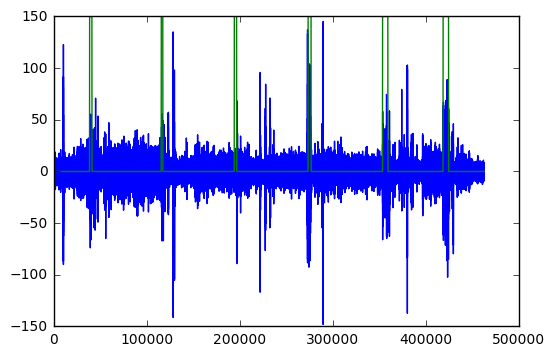

In [160]:
time=range(len(x_filt))
#print x_filt.shape
plt.plot(time, x_filt)
plt.plot(time, labels*150)
plt.show()

(462848,)


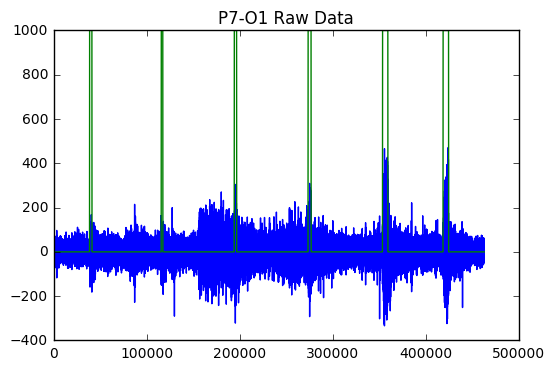

In [161]:
#Visualize Raw Data
import matplotlib.pyplot as plt

#Make exagerrated labels
y = [i*1000 for i in labels]
#Random Node choice
x = data[:,3]
print x.shape
time = [i for i in range(len(x))]
plt.plot(time,x)
plt.plot(time,y)
plt.title(nodes[3] + " Raw Data")
plt.show()




In [162]:
#bandpass
#does bandpass to all nodes



In [163]:

#taking the mean of each second
import numpy as np

def take_mean_every_64_points(x):
    i=0; 
    mean_array=[]
    while(i<(x.shape[0])):
        array=x[i:i+65]
        mean_array.append(np.mean(array))
        i+=64
    mean_array=np.array(mean_array)
    return mean_array
def take_max_every_64_points(x):
    i=0; 
    mean_array=[]
    while(i<(x.shape[0])):
        array=x[i:i+65]
        mean_array.append(np.max(array))
        i+=64
    mean_array=np.array(mean_array)
    return mean_array



3


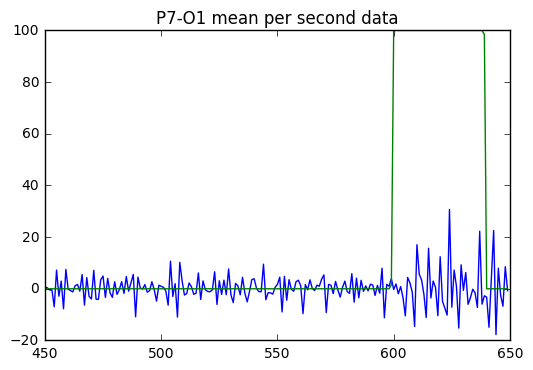

In [164]:
mean_x=take_mean_every_64_points(x)
mean_labels=take_mean_every_64_points(labels)

test = [i for i in range(64*3)]
print take_mean_every_64_points(np.array(test)).shape[0]
plt.plot(time[:mean_x.shape[0]][450:650],mean_x[450:650])
plt.title(nodes[3] + " mean per second data")
plt.plot(time[:mean_x.shape[0]][450:650], (mean_labels*100)[450:650])
plt.show()






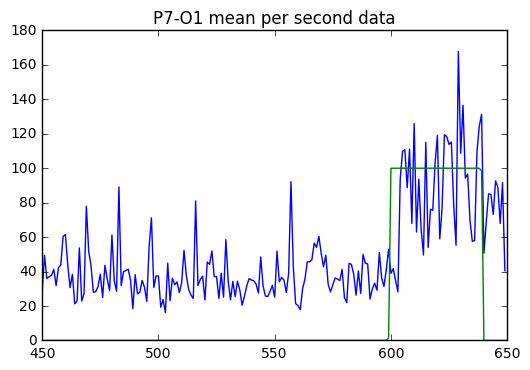

In [165]:
def plot_data(data, x, y):
    plt.plot(time[:data.shape[0]][x:y],data[x:y])
    plt.title(nodes[3] + " mean per second data")
    plt.plot(time[:data.shape[0]][x:y], (mean_labels*100)[x:y])
    plt.show()

plot_data(take_max_every_64_points(x), 450, 650)

(7232,)


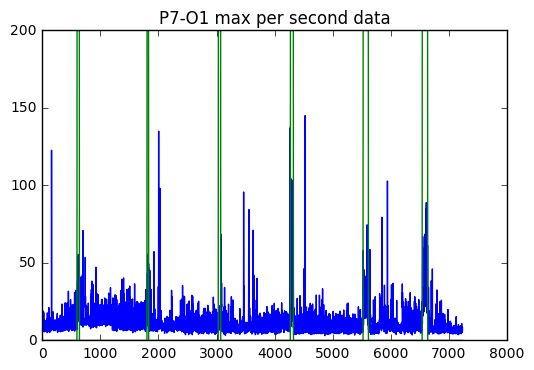

[]

In [166]:

#go through each coloumn to take the max freq of each second 
#makes a 5058 by 23 array: 5058 seconds and 23 different nodes




    

dataset=np.apply_along_axis(take_max_every_64_points, 0,x_filt)
print dataset.shape


max_freq_x=take_max_every_64_points(x_filt)
max_labels=take_max_every_64_points(labels)
plt.plot(time[:max_freq_x.shape[0]],max_freq_x)
plt.title(nodes[3] + " max per second data")
plt.plot(time[:max_freq_x.shape[0]], max_labels*200)
plt.show()
plt.plot()



In [182]:

#do we need to shuffle the data? what part do we make the training and testing set 
#80 percent of the total chunks

from sklearn import cross_validation as cv 
training_data, testing_data, training_labels, testing_labels =cv.train_test_split(dataset,max_labels)


training_data=training_data.reshape(-1,1)
training_labels=training_labels.reshape(-1,1)
testing_data=testing_data.reshape(-1,1)
testing_labels=testing_labels.reshape(-1,1)

#testing_data.shape, training_labels.shape, testing_labels.shape

from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(training_data,training_labels)
#model1.fit()  # this can be modified if you used different variables
print "Training accuracy:" + str(model1.score(training_data,training_labels))

model1.score(testing_data, testing_labels)
print"Testing accuracey"+ str(model1.score(testing_data,testing_labels))

    
    
    
    


Training accuracy:0.955752212389
Testing accuracey0.95907079646
